In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
os.listdir()

['.ipynb_checkpoints', 'car_resale price prediction.ipynb', 'data.csv']

In [5]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [6]:
df=pd.read_csv('data.csv')

In [7]:
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [8]:
df.shape

(9970, 20)

In [9]:
df['title'].nunique() # we have 9169 different categories so having this column in our dataset would be an issue

9169

In [10]:
df.drop('title',axis=1,inplace=True)

In [11]:
df.shape

(9970, 19)

In [12]:
# lets check the duplicates
df.duplicated().sum()# since it has 282 duplicates so we have to drop them
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum() # now it doesn't have null values

0

In [14]:
# null-values
aa=(df.isnull().sum()/df.shape[0])*100
bb=df.isnull().sum()
null_values=pd.DataFrame({'value':bb,'perc':aa})
null_values

,value,perc
price_in_aed,0,0.000000
kilometers,0,0.000000
body_condition,0,0.000000
mechanical_condition,0,0.000000
seller_type,0,0.000000
body_type,0,0.000000
no_of_cylinders,58,0.598679
transmission_type,0,0.000000
regional_specs,0,0.000000
horsepower,0,0.000000


In [15]:
# since year has 970 null values which is almost 10 percent so we should drop this column
df.drop('year',axis=1,inplace=True)

In [16]:
df['motors_trim'].nunique() # since this columns has 856 different categories and also 28 missing values so we are going to drop
df.drop('motors_trim',axis=1,inplace=True)

In [17]:
df.isnull().sum()

price_in_aed             0
kilometers               0
body_condition           0
mechanical_condition     0
seller_type              0
body_type                0
no_of_cylinders         58
transmission_type        0
regional_specs           0
horsepower               0
fuel_type                0
steering_side            0
color                    0
emirate                  0
company                  0
model                    0
date_posted              0
dtype: int64

In [18]:
df['no_of_cylinders'].value_counts(dropna=True)
df.dropna(inplace=True)

In [19]:
# now lets see no. of cylinders columns

In [20]:
df = df[df['horsepower'] != 'Unknown']
df = df[df['no_of_cylinders'] != 'Unknown']
df = df[df['no_of_cylinders'] != 'None']

In [21]:
df.head()

,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,color,emirate,company,model,date_posted
1,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,White,Sharjah,chevrolet,silverado,14/01/2022
2,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,Blue,Sharjah,mercedes-benz,e-class,05/05/2022
3,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,Red,Dubai,ferrari,488-spider,30/04/2022
4,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,White,Dubai,renault,dokker,13/05/2022
5,"98,000",84000,Perfect inside and out,Perfect inside and out,Owner,Sedan,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,Gold,Dubai,audi,a7,30/04/2022


In [22]:
obj=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns

In [23]:
def value_count(a):
    aa=df[a].nunique()
    bb=df[a].unique()
    print(a,aa)
    print(a,bb)

In [24]:
for i in obj:
    print(value_count(i),end='***********************')
    print('/n')

price_in_aed 1400
price_in_aed ['110,000' '78,000' '899,000' ... '31,800' '24,999' '77,700']
None***********************/n
body_condition 4
body_condition ['Perfect inside and out' 'Normal wear & tear, a few issues'
 'A bit of wear & tear, all repaired' 'No accidents, very few faults']
None***********************/n
mechanical_condition 5
mechanical_condition ['Perfect inside and out' 'Minor faults, all fixed'
 'Major faults fixed, small remain' 'Ongoing minor & major faults'
 'Major faults, all fixed']
None***********************/n
seller_type 3
seller_type ['Dealer' 'Owner' 'Dealership/Certified Pre-Owned']
None***********************/n
body_type 13
body_type ['SUV' 'Sedan' 'Hard Top Convertible' 'Wagon' 'Pick Up Truck' 'Van'
 'Coupe' 'Hatchback' 'Soft Top Convertible' 'Crossover' 'Sports Car'
 'Other' 'Utility Truck']
None***********************/n
no_of_cylinders 7
no_of_cylinders ['8' '6' '4' '3' '12' '10' '5']
None***********************/n
transmission_type 2
transmission_type ['Au

In [25]:
def price(a):
    a=a.split(',')
    a=''.join(a)
    return int(a)
df['price_in_aed']=df['price_in_aed'].apply(price)

In [26]:
df['price_in_aed']=df['price_in_aed'].astype('int')

In [27]:
df['no_of_cylinders']=pd.to_numeric(df['no_of_cylinders'])

In [28]:
df['horsepower'].unique()

array(['400 - 500 HP', '600 - 700 HP', 'Less than 150 HP', '200 - 300 HP',
       '500 - 600 HP', '300 - 400 HP', '150 - 200 HP', '700 - 800 HP',
       '800 - 900 HP', '900+ HP'], dtype=object)

In [29]:
df['horsepower']=df['horsepower'].replace('Less than 150 HP','100')
df['horsepower']=df['horsepower'].apply(lambda x:x.split()[0][:3])

In [30]:
df['horsepower']=pd.to_numeric(df['horsepower'])

In [31]:
df.dtypes

price_in_aed             int32
kilometers               int64
body_condition          object
mechanical_condition    object
seller_type             object
body_type               object
no_of_cylinders          int64
transmission_type       object
regional_specs          object
horsepower               int64
fuel_type               object
steering_side           object
color                   object
emirate                 object
company                 object
model                   object
date_posted             object
dtype: object

In [32]:
obj

Index(['price_in_aed', 'body_condition', 'mechanical_condition', 'seller_type',
       'body_type', 'no_of_cylinders', 'transmission_type', 'regional_specs',
       'horsepower', 'fuel_type', 'steering_side', 'color', 'emirate',
       'company', 'model', 'date_posted'],
      dtype='object')

In [33]:
df['date_posted'].unique()
df['date']=df['date_posted'].apply(lambda x:x.split('/')[0])
df['month']=df['date_posted'].apply(lambda x:x.split('/')[1])
df['year']=df['date_posted'].apply(lambda x:x.split('/')[2])

In [34]:
df.drop('date_posted',axis=1,inplace=True)

In [35]:
df.columns

Index(['price_in_aed', 'kilometers', 'body_condition', 'mechanical_condition',
       'seller_type', 'body_type', 'no_of_cylinders', 'transmission_type',
       'regional_specs', 'horsepower', 'fuel_type', 'steering_side', 'color',
       'emirate', 'company', 'model', 'date', 'month', 'year'],
      dtype='object')

In [36]:
df['year'].value_counts()
#df.drop('year',axis=1,inplace=True)

2022    8163
2021     647
2020      14
2019       2
2018       1
Name: year, dtype: int64

In [37]:
df.head()

,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,color,emirate,company,model,date,month,year
1,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400,Gasoline,Left Hand Side,White,Sharjah,chevrolet,silverado,14,01,2022
2,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400,Gasoline,Left Hand Side,Blue,Sharjah,mercedes-benz,e-class,05,05,2022
3,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600,Gasoline,Left Hand Side,Red,Dubai,ferrari,488-spider,30,04,2022
4,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,100,Gasoline,Left Hand Side,White,Dubai,renault,dokker,13,05,2022
5,98000,84000,Perfect inside and out,Perfect inside and out,Owner,Sedan,6,Automatic Transmission,GCC Specs,200,Gasoline,Left Hand Side,Gold,Dubai,audi,a7,30,04,2022


In [38]:
obj=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns

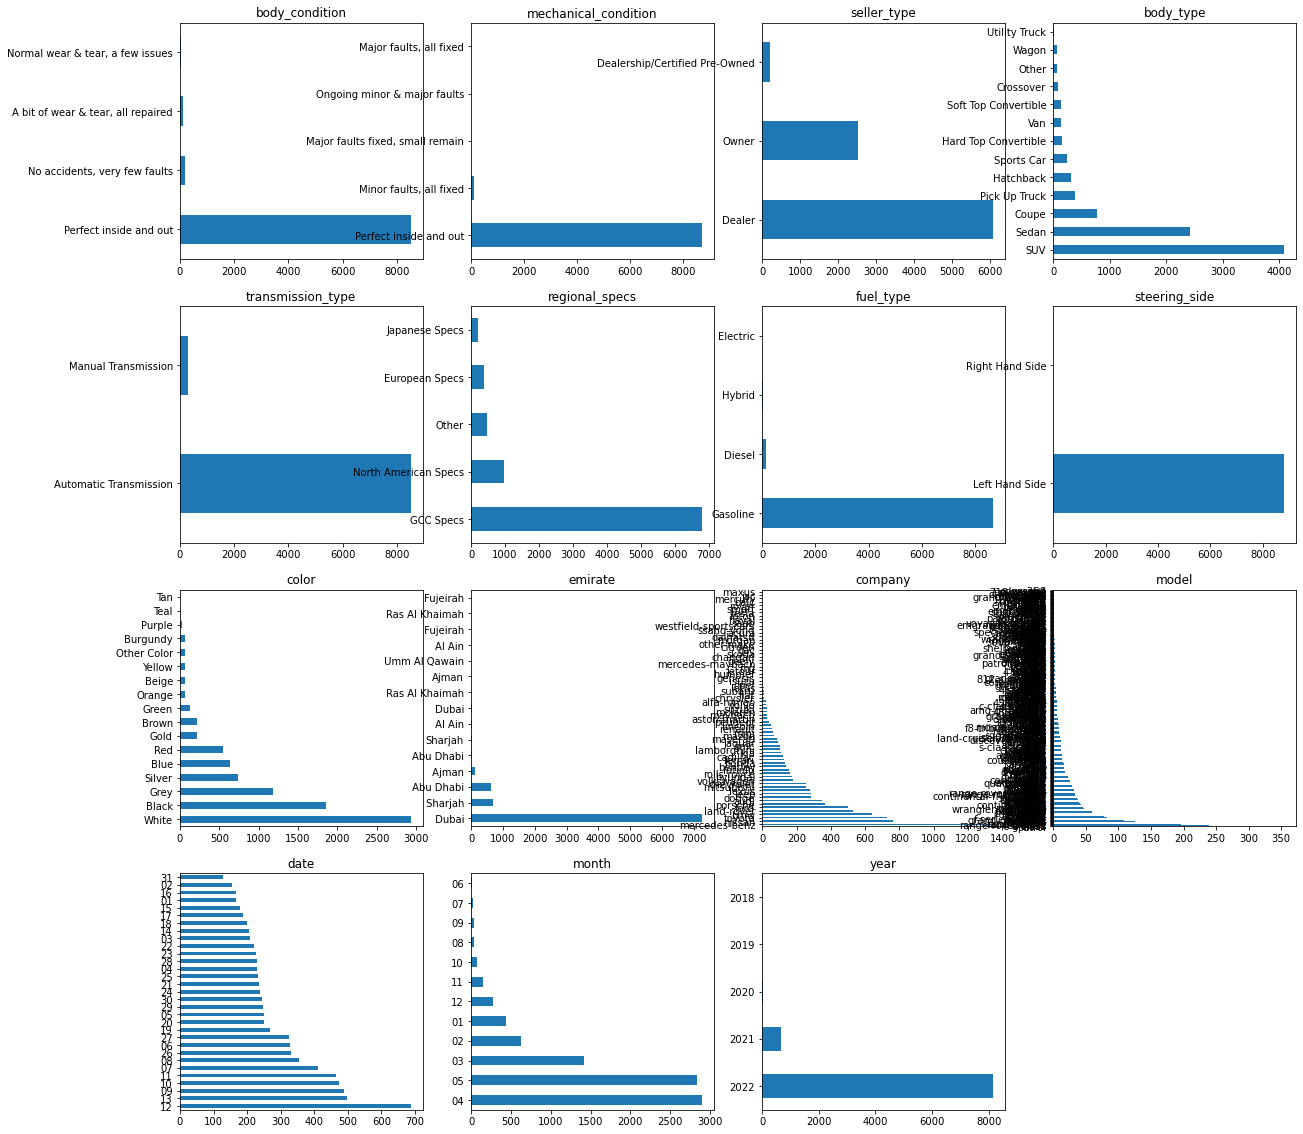

In [39]:
# function to see different categories for a column
plt.figure(figsize=(20,20))
for i in range(len(obj)):
        plt.subplot(4,4,i+1)
        df[obj[i]].value_counts().plot(kind='barh')
        plt.title(obj[i])
plt.show()

In [40]:
def values(a):
    print(a,df[a].nunique())
    print(df[a].value_counts())

In [41]:
values('transmission_type')

transmission_type 2
Automatic Transmission    8518
Manual Transmission        309
Name: transmission_type, dtype: int64


In [42]:
df['transmission_type']=df['transmission_type'].replace(['Automatic Transmission','Manual Transmission'], ['Automatic', 'Manual'])

In [43]:
values('steering_side') # since the right hand side has only one side so we are going to drop it

steering_side 2
Left Hand Side     8825
Right Hand Side       2
Name: steering_side, dtype: int64


In [44]:
df.drop('steering_side',axis=1,inplace=True) # # since the right hand side has only one side so we are going to drop it

In [45]:
obj

Index(['body_condition', 'mechanical_condition', 'seller_type', 'body_type',
       'transmission_type', 'regional_specs', 'fuel_type', 'steering_side',
       'color', 'emirate', 'company', 'model', 'date', 'month', 'year'],
      dtype='object')

In [46]:
df['emirate']=df['emirate'].apply(lambda x:x.strip().replace(' ',''))
values('emirate')

emirate 8
Dubai           7275
Sharjah          717
AbuDhabi         661
Ajman            123
AlAin             27
RasAlKhaimah      13
UmmAlQawain        6
Fujeirah           5
Name: emirate, dtype: int64


In [47]:
obj,num

(Index(['body_condition', 'mechanical_condition', 'seller_type', 'body_type',
        'transmission_type', 'regional_specs', 'fuel_type', 'steering_side',
        'color', 'emirate', 'company', 'model', 'date', 'month', 'year'],
       dtype='object'),
 Index(['price_in_aed', 'kilometers', 'no_of_cylinders', 'horsepower'], dtype='object'))

In [48]:
df['date']=pd.to_numeric(df['date'])
df['month']=pd.to_numeric(df['month'])

In [49]:
df.columns

Index(['price_in_aed', 'kilometers', 'body_condition', 'mechanical_condition',
       'seller_type', 'body_type', 'no_of_cylinders', 'transmission_type',
       'regional_specs', 'horsepower', 'fuel_type', 'color', 'emirate',
       'company', 'model', 'date', 'month', 'year'],
      dtype='object')

In [50]:
obj=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns

In [51]:
obj,len(obj)

(Index(['body_condition', 'mechanical_condition', 'seller_type', 'body_type',
        'transmission_type', 'regional_specs', 'fuel_type', 'color', 'emirate',
        'company', 'model', 'year'],
       dtype='object'),
 12)

In [52]:
for i in obj:
    values(i)
    print('***********')

body_condition 4
Perfect inside and out                8527
No accidents, very few faults          175
A bit of wear & tear, all repaired     102
Normal wear & tear, a few issues        23
Name: body_condition, dtype: int64
***********
mechanical_condition 5
Perfect inside and out              8704
Minor faults, all fixed              114
Major faults fixed, small remain       6
Ongoing minor & major faults           2
Major faults, all fixed                1
Name: mechanical_condition, dtype: int64
***********
seller_type 3
Dealer                            6086
Owner                             2530
Dealership/Certified Pre-Owned     211
Name: seller_type, dtype: int64
***********
body_type 13
SUV                     4088
Sedan                   2416
Coupe                    772
Pick Up Truck            377
Hatchback                307
Sports Car               234
Hard Top Convertible     147
Van                      137
Soft Top Convertible     132
Crossover                 79
Other

In [53]:
df.head()

,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,color,emirate,company,model,date,month,year
1,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic,North American Specs,400,Gasoline,White,Sharjah,chevrolet,silverado,14,1,2022
2,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic,GCC Specs,400,Gasoline,Blue,Sharjah,mercedes-benz,e-class,5,5,2022
3,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic,GCC Specs,600,Gasoline,Red,Dubai,ferrari,488-spider,30,4,2022
4,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual,GCC Specs,100,Gasoline,White,Dubai,renault,dokker,13,5,2022
5,98000,84000,Perfect inside and out,Perfect inside and out,Owner,Sedan,6,Automatic,GCC Specs,200,Gasoline,Gold,Dubai,audi,a7,30,4,2022


In [54]:
df.drop('model',axis=1,inplace=True)

In [55]:
obj=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns

In [56]:
print(len(obj))
print(obj)

11
Index(['body_condition', 'mechanical_condition', 'seller_type', 'body_type',
       'transmission_type', 'regional_specs', 'fuel_type', 'color', 'emirate',
       'company', 'year'],
      dtype='object')


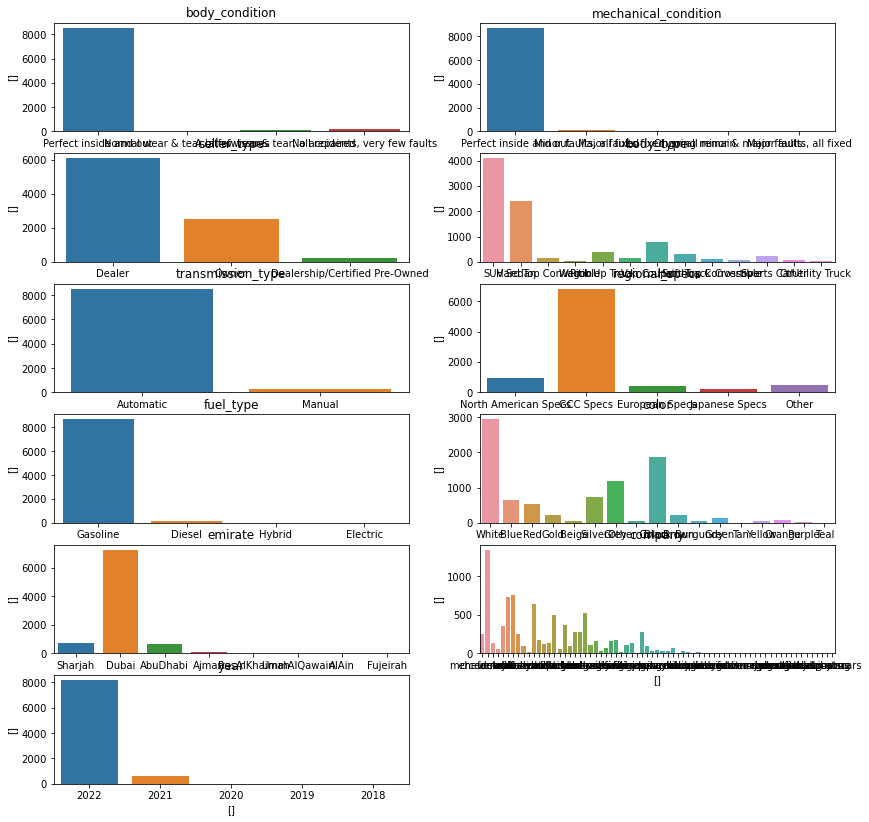

In [57]:
plt.figure(figsize=(14,14))
xx=len(obj)
for i,j in zip(range(xx),obj):
    plt.subplot(6,2,i+1)
    sns.countplot(df[j])
    plt.title(j)
    #plt.xticks(rotation=90)
    plt.xlabel([])
    plt.ylabel([])
plt.show()

### Bi-variate analysis

In [58]:
def unique_value(a):
    return a,df[a].nunique()
for i in obj:
    print(unique_value(i))

('body_condition', 4)
('mechanical_condition', 5)
('seller_type', 3)
('body_type', 13)
('transmission_type', 2)
('regional_specs', 5)
('fuel_type', 4)
('color', 17)
('emirate', 8)
('company', 69)
('year', 5)


In [59]:
print(num,obj)
print(len(obj))

Index(['price_in_aed', 'kilometers', 'no_of_cylinders', 'horsepower', 'date',
       'month'],
      dtype='object') Index(['body_condition', 'mechanical_condition', 'seller_type', 'body_type',
       'transmission_type', 'regional_specs', 'fuel_type', 'color', 'emirate',
       'company', 'year'],
      dtype='object')
11


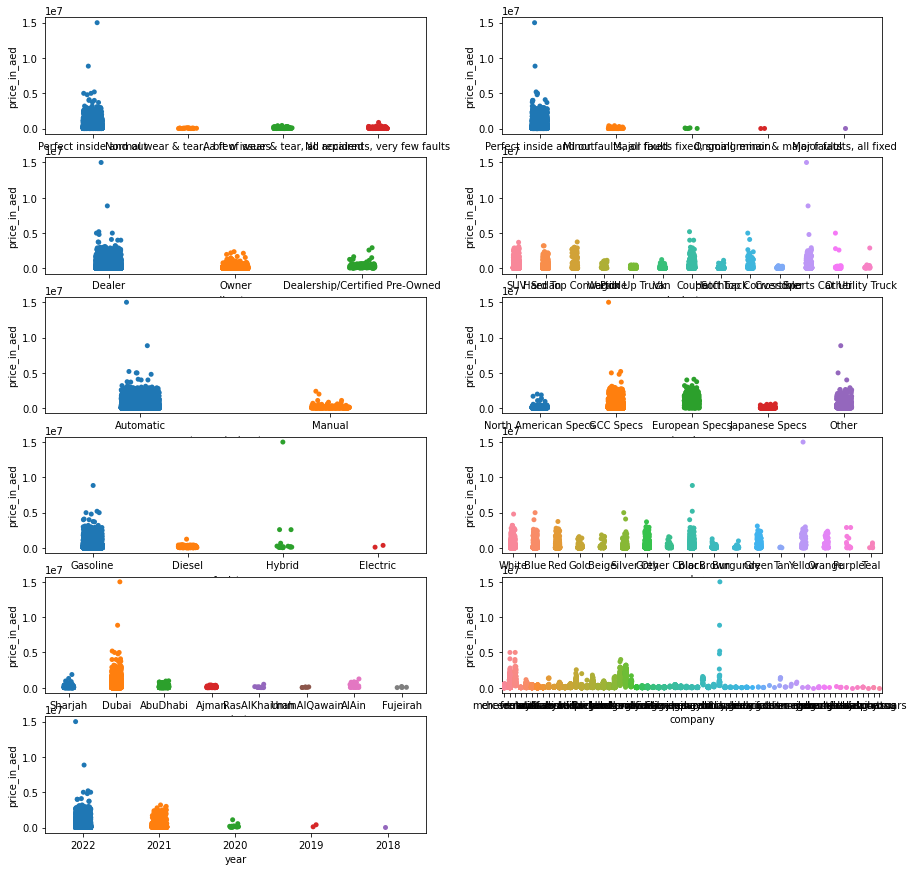

In [60]:
plt.figure(figsize=(15,15))
for i in range(len(obj)):
    plt.subplot(6,2,i+1)
    sns.stripplot(x=obj[i],y='price_in_aed',data=df)
plt.show() 

## Outliers

In [61]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
price_in_aed,8827.0,256355.736830,4.647941e+05,6000.0,15500.0,18000.0,20000.0,22904.0,24500.0,32000.0,52950.0,107000.0,240000.0,622599.4,1120000.0,1250000.0,1450000.0,1799000.00,2318500.0,14999000.0
kilometers,8827.0,99330.255579,1.226142e+06,0.0,0.0,0.0,0.0,0.0,0.0,50.0,23072.5,75200.0,132000.0,180000.0,210000.0,220000.0,234000.0,250899.64,294000.0,115000000.0
no_of_cylinders,8827.0,6.247309,1.974949e+00,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,8.0,8.0,8.0,10.0,12.0,12.00,12.0,12.0
horsepower,8827.0,303.647898,1.457622e+02,100.0,100.0,100.0,100.0,100.0,150.0,150.0,200.0,300.0,400.0,500.0,600.0,600.0,600.0,700.00,700.0,900.0
date,8827.0,15.151694,8.299609e+00,1.0,1.0,2.0,2.0,3.0,3.0,5.0,9.0,13.0,22.0,27.0,29.0,30.0,30.0,30.00,31.0,31.0
month,8827.0,4.337827,2.104687e+00,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,5.0,5.0,10.0,11.0,12.0,12.00,12.0,12.0


In [62]:
len(num)

6

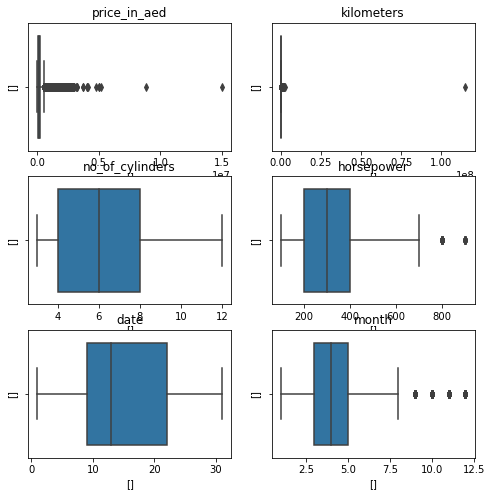

In [63]:
plt.figure(figsize=(8,8))
for i in range(len(num)):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[num[i]])
    plt.title(num[i])
    plt.xlabel([])
    plt.ylabel([])
plt.show()

In [64]:
outliersss=df[['price_in_aed','kilometers']]
outliers_no=df.drop(outliersss,axis=1)

In [65]:
def outlierss(a):
    x=a.clip(upper=a.quantile(0.99))
    return x

In [66]:
outliersss=outliersss.apply(outlierss)

In [67]:
df=pd.concat([outliers_no,outliersss],axis=1)

<AxesSubplot:>

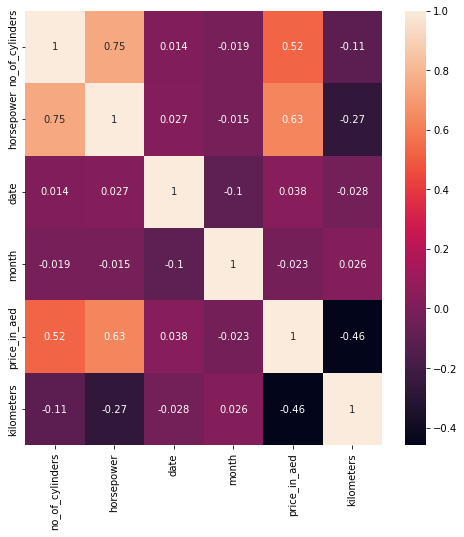

In [68]:
aa=df.corr()
bb=aa[abs(aa)>0.5]
plt.figure(figsize=(8,8))
sns.heatmap(aa,annot=True)

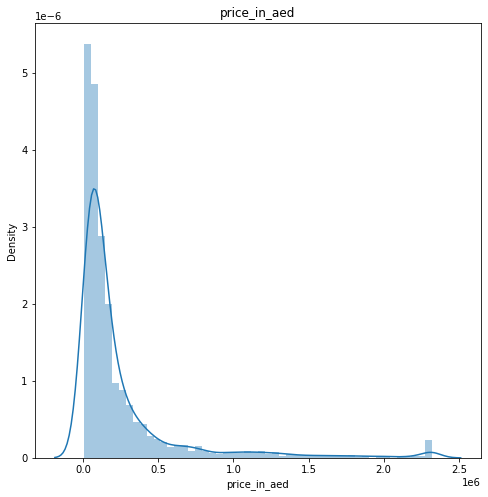

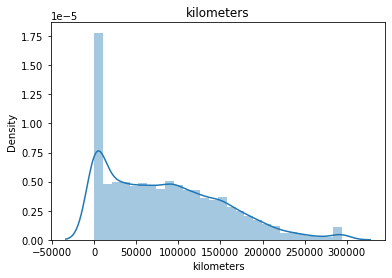

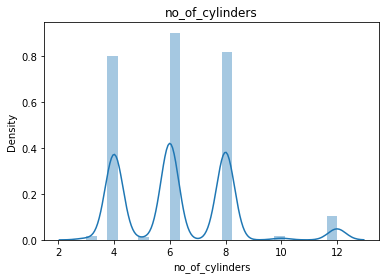

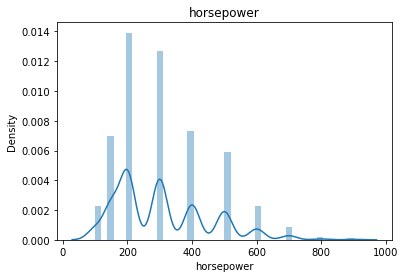

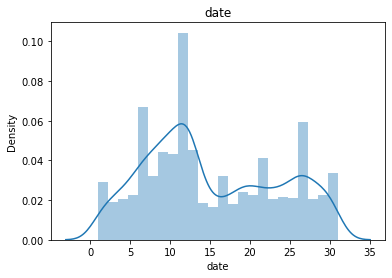

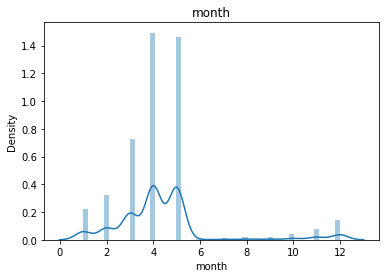

In [69]:
plt.figure(figsize=(8,8))
for i in num:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

In [70]:
for i in num:
    print(i,'skew',df[i].skew())
    print(i,'kurtosis',df[i].kurt())

price_in_aed skew 3.248878109838906
price_in_aed kurtosis 11.426929263576387
kilometers skew 0.6807443575302773
kilometers kurtosis -0.12455889643723994
no_of_cylinders skew 0.7384538662339467
no_of_cylinders kurtosis 0.5842246981354591
horsepower skew 0.8986693223970532
horsepower kurtosis 0.40206855009038733
date skew 0.28758422327713035
date kurtosis -1.0875952506261446
month skew 1.9529470332307761
month kurtosis 5.231742984590561


In [71]:
## Shapiro test to see if the target variable is normally distributed or not
aa=stats.shapiro(df['price_in_aed'])

In [72]:
def normality_test(a):
    if a>0.05:
        print('It is normally distributed')
    else:
        print('It is not normally distributed')   

In [73]:
normality_test(aa[1])

It is not normally distributed


In [74]:
aa=stats.boxcox(df['price_in_aed'])
bb=stats.shapiro(aa[0])
normality_test(bb[1])

It is not normally distributed


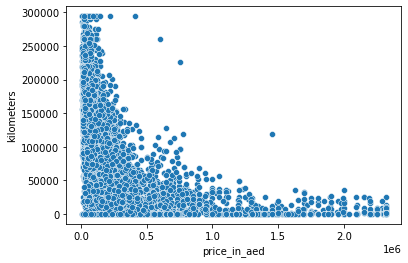

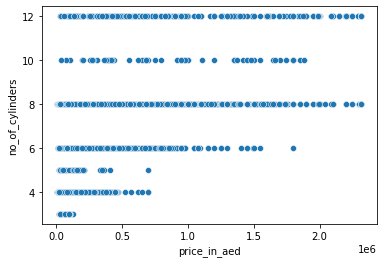

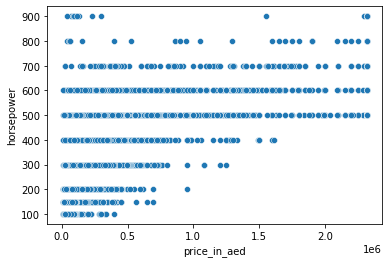

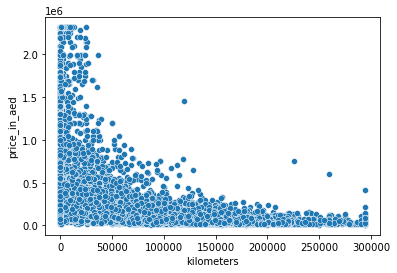

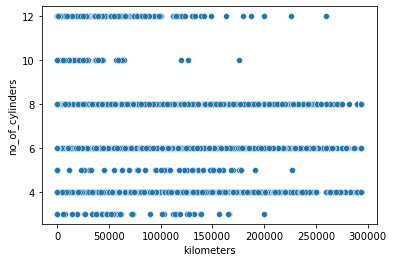

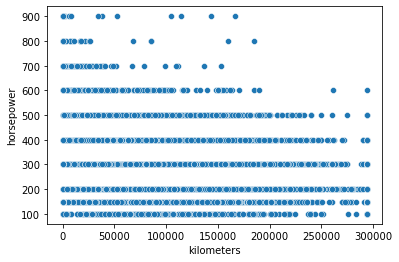

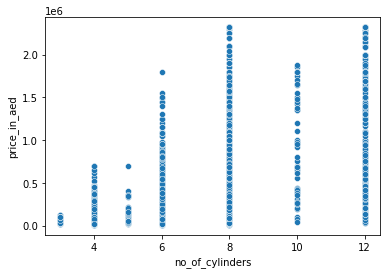

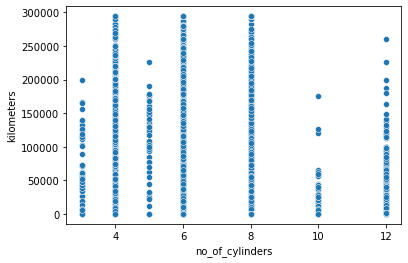

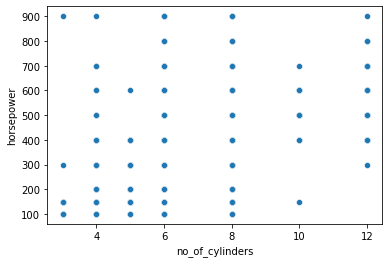

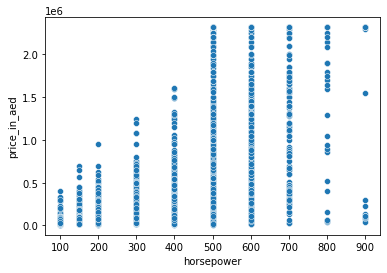

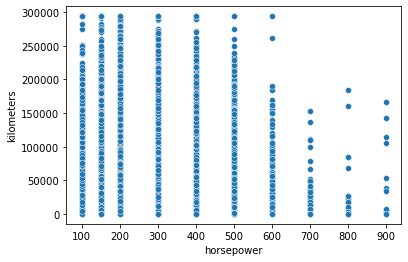

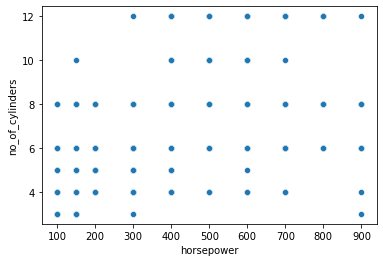

In [75]:
for i in num[:-2]:
    for j in num[:-2]:
        if i!=j:
            sns.scatterplot(df[i],df[j])
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()

In [76]:
ll=LabelEncoder()
for i in obj:
    df[i]=ll.fit_transform(df[i])

In [77]:
x=df.drop('price_in_aed',axis=1)
y=df['price_in_aed']

In [78]:
# splitting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [79]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6620, 16)
(6620,)
(2207, 16)
(2207,)


In [80]:
# Standardisation
ss=StandardScaler()
x_train_sc=ss.fit_transform(x_train)
x_test_sc=ss.transform(x_test)

In [81]:
## Multi-linear Regression , since our output variable is not normally distributed so we not gonna apply that

In [82]:
def evaluation_metrics(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    print('training r square is',model.score(x_train,y_train))
    print('testing r square is',model.score(x_test,y_test))
    y_pred=model.predict(x_train)
    print('mean squared error is',mean_squared_error(y_train,y_pred))
    print('mean absolut error is',mean_absolute_error(y_train,y_pred))
    mse=mean_squared_error(y_train,y_pred)
    print('rmse',pow(mse,1/2))

In [83]:
## Multi-linear RIegression
lr=LinearRegression(n_jobs=-1)
evaluation_metrics(lr,x_train_sc,y_train,x_test_sc,y_test)

training r square is 0.541331807056805
testing r square is 0.5294664063262641
mean squared error is 72167076169.25607
mean absolut error is 175875.38712960697
rmse 268639.30495974724


In [84]:
# Gradient Descent
gd=SGDRegressor(alpha=0.00001,l1_ratio=0.15,fit_intercept=True,max_iter=2000)
evaluation_metrics(gd,x_train_sc,y_train,x_test_sc,y_test)

training r square is 0.5402459326253635
testing r square is 0.5278444712375376
mean squared error is 72337928179.51047
mean absolut error is 175993.61811625326
rmse 268957.1121564003


In [85]:
## Decision-Tree
df=DecisionTreeRegressor()
params={'max_depth':[5,6,7],'min_samples_split':[100,200],'min_samples_leaf':[100,200]}
gd=GridSearchCV(df,param_grid=params,cv=5,n_jobs=-1)

In [86]:
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [100, 200]})

In [87]:
gd.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=100, min_samples_split=100)

In [88]:
## Decision Tree
df=DecisionTreeRegressor(max_depth=7,min_samples_leaf=100,min_samples_split=100)
evaluation_metrics(df,x_train,y_train,x_test,y_test)

training r square is 0.7676441016534277
testing r square is 0.7595197787262027
mean squared error is 36558989858.77519
mean absolut error is 95418.13100321035
rmse 191204.05293501285


In [89]:
# Boosting -Random-Forest
rf=RandomForestRegressor(n_estimators=500,max_depth=7)#min_samples_leaf=100,min_samples_split=100)
evaluation_metrics(rf,x_train,y_train,x_test,y_test)

training r square is 0.9148446140926538
testing r square is 0.8740304084009478
mean squared error is 13398389763.117796
mean absolut error is 64901.74198424546
rmse 115751.4136549433


## Gradient-Boosting

In [90]:
gd=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000,max_depth=7,min_samples_leaf=100,min_samples_split=100)
evaluation_metrics(gd,x_train,y_train,x_test,y_test)

training r square is 0.9668964229146618
testing r square is 0.8983727923561541
mean squared error is 5208532890.983159
mean absolut error is 41938.1817460045
rmse 72170.16621141425


In [91]:
def y_testt(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    return y_test_pred

In [92]:
gd=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000,max_depth=7,min_samples_leaf=100,min_samples_split=100)
y_test_pred=y_testt(gd,x_train,y_train,x_test,y_test)

In [93]:
print(y_test.shape)
print(y_test_pred.shape)
matrix=pd.DataFrame({'actual':y_test,'prediction':y_test_pred})

(2207,)
(2207,)


In [94]:
matrix

,actual,prediction
3918,99999,404888.004377
6996,370000,386615.979487
5729,79000,63633.182951
5632,111000,43408.233188
1188,24000,21072.036139
...,...,...
1408,199000,409984.494644
1556,141000,194314.875246
8434,160000,80227.241614
6986,67500,60392.106762
